In [2]:
from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()

import numpy as np

import matplotlib.pyplot as plt

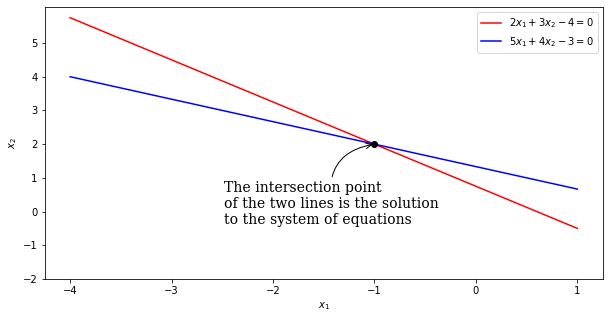

In [3]:
# Graphical solution

x = np.arange(-4, 2, 1)
x2 = np.arange(-2, 6, 1)

y1 = (4 - 2*x) / 3
y2 = (3 - 5*x) / 4

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("${x_1}$")
ax.set_ylabel("${x_2}$")

ax.plot(x, y2, 'r', label="$2{x_1}+3{x_2}-4=0$")
ax.plot(x, y1, 'b', label="$5{x_1}+4{x_2}-3=0$")

ax.plot(-1, 2, 'black', lw=5, marker='o')

ax.annotate("The intersection point\nof the two lines is the solution\nto the system of equations", fontsize=14, family="serif", xy=(-1, 2),
    xycoords="data", xytext=(-150, -80),
    textcoords="offset points", arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_xticks(x)
ax.set_yticks(x2)

ax.legend()

### Squared system

In [4]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

A.rank()

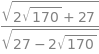

In [5]:
A.condition_number()

In [6]:
sympy.N(_)

In [8]:
A.norm()

In [18]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [19]:
np.linalg.matrix_rank(A)

2

In [20]:
np.linalg.cond(A)

In [21]:
np.linalg.norm(A)

In [9]:
# LU factorization

A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

L, U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [10]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [11]:
L * U == A

True

In [12]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [13]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P, L, U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [14]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [15]:
la.solve(A, b)

array([-1.,  2.])

In [16]:
# Symbolic vs Numerical
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x = A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

Text(0.5, 0, '$p$')

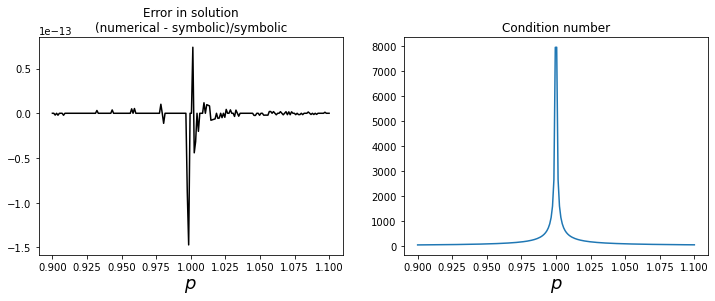

In [17]:
#Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

# Numerical problem specification
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])

axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)


### Rectangular system


In [22]:
x_vars = sympy.symbols("x_1, x_2, x_3")

A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])

sympy.solve(A*x - b, x_vars)

### Least squares

In [39]:
# define true model parameters

x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# Simulate noisy data
m = 100
X = 1 - 2 * np.random.rand(m)

Y = a + b * X + c * X**2 + np.random.randn(m)
# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative

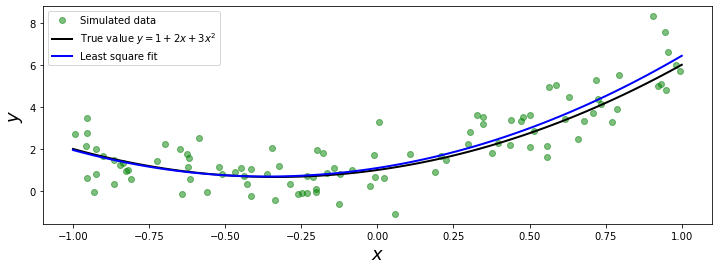

In [36]:
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x**2

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')

ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

In [84]:
# fit the data to the model using linear least square:
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

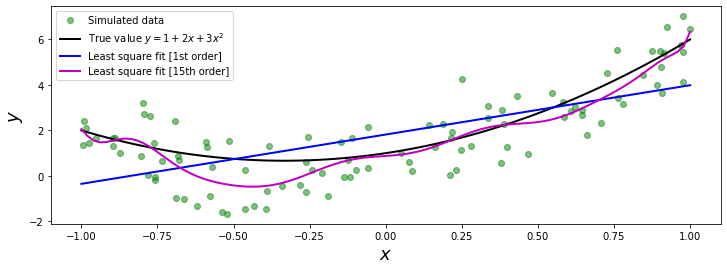

In [86]:
# 15th order polynomial
A = np.vstack([X**n for n in range(16)])

sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')

ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x +3x^2$')

ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')

ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')

ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)

ax.legend(loc=2)


### Eigenvalues / Eigenvectors

In [88]:
eps, delta = sympy.symbols("epsilon, Delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

⎡ε  Δ ⎤
⎢     ⎥
⎣Δ  -ε⎦

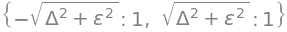

In [89]:
H.eigenvals()

In [90]:
H.eigenvects()

⎡⎛                  ⎡⎡      -Δ        ⎤⎤⎞  ⎛                 ⎡⎡      -Δ       
⎢⎜    _________     ⎢⎢────────────────⎥⎥⎟  ⎜   _________     ⎢⎢───────────────
⎢⎜   ╱  2    2      ⎢⎢       _________⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢       ________
⎢⎜-╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2 ⎥⎥⎟, ⎜╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2
⎢⎜                  ⎢⎢ε + ╲╱  Δ  + ε  ⎥⎥⎟  ⎜                 ⎢⎢ε - ╲╱  Δ  + ε 
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

 ⎤⎤⎞⎤
─⎥⎥⎟⎥
_⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [92]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()

# Orthogonality
sympy.simplify(evec1[0].T * evec2[0])

[0]

In [94]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
evals, evecs = la.eig(A)

evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [95]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [96]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

### Nonlinear equations

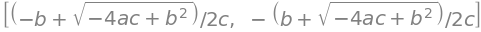

In [98]:
x, a, b, c = sympy.symbols("x, a, b, c")
sympy.solve(a + b*x + c*x**2, x)

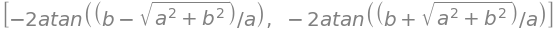

In [99]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

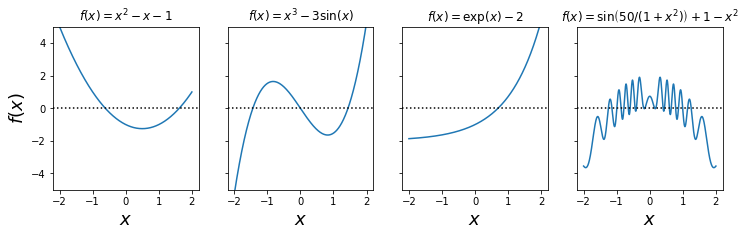

In [104]:
x = np.linspace(-2, 2, 1000)
# four examples of nonlinear functions

f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [
    r'$f(x)=x^2-x-1$',
    r'$f(x)=x^3-3\sin(x)$',
    r'$f(x)=\exp(x)-2$',
    r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$'
]

for n, title in enumerate(titles):
    axes[n].set_title(title)
